<div class="">
<br><br>
<center><br><font size="9"><font face="times new roman"><strong>Dental Disease Identification
<center><br><font size="9"><font face="times new roman"><strong>Using Fuzzy Inference System
<br><br><br><br><br><br><br>
<br><strong>Oleh :
<br><br>
<br><strong>Ayu Meilinda
<br><br>
<br><strong>09011181722019
<br><br><br><br><br><br><br><br>
<br><strong>Mata Kuliah Kecerdasan Buatan
<br><br><br><br>
<br><strong>Dosen Pengampuh : 
<br><br>
<br><strong>Prof. Dr. Ir. Siti Nurmaini, M.T.
<br><br><br><br><br><br>
<br><strong>Jurusan Sistem Komputer
<br><br>
<br><strong>Fakultas Ilmu Komputer
<br><br>
<br><strong>Universitas Sriwijaya
<br><br>
<br><strong>2019

# Pendahuluan

Ilmu kedokteran khususnya kedokteran dibidang gigi sudah mengalami perkembangan pesat. Ada banyak obat baru yang ditemukan untuk mengatasi berbagai penyakit yang bermunculan sekarang. Masalah yang saat ini dihadapi oleh masyarakat adalah banyaknya varian penyakit gigi dan kelainan gigi. Hal ini yang menuntut para ahli gigi, baik yang telah berprofesi dalam dunia kedokteran, maupun mahasiswa yang sementara menyelesaikan perkuliahannya sebagai calon dokter gigi. Mereka membutuhan analisis yang akurat dan cepat. Oleh karena itu pada penelitian ini dibangun sistem yang mempermudah identifikasi penyakit gigi dan bukan bertujuan untuk menggantikan tugas dari seorang dokter ataupun seorang pakar dalam bidang tertentu. 

Untuk menentukan penyakit gigi atau kelainan gigi, ada beberapa yang harus dipertimbangkan yaitu :
1. Plak  
2. Gusi Meradang 
2. Gusi Memerah 

In [57]:
#memanggil library yang akan kita gunakan
#skfuzzy adalah library fuzzy logic pada python yang bekerja dengan numpy array
import numpy as np #import numpy gunkan np untuk menggunakan library ini
import skfuzzy as fuzz #import library fuzzy gunakan fuzz untuk menggunkaan library ini
from skfuzzy import control as ctrl #panggi library control dari skfuzzy gunakan ctr untuk menggunakan library ini

# Fuzzifikasi
Fuzzyfikasi merupakan proses untuk mengubah input sistem yang mempunyai nilai tegas menjadi variabel linguistik munggunakan fungsi keanggotaan yang disimpan dalam basis pengetahuan fuzzy. Dalam hal ini, terdapat 4 variabel, yaitu 3 variabel input dan 1 variabel output.

## Variabel Input  (Antecedents) :
<br>1. Plak : Ringan, Sedang dan Parah.
<br>2. Gusi Meradang : Ringan, Sedang dan Parah.
<br>3. Gusi Memerah : Ringan, Sedang dan Parah.
<br>
## Variabel Output (Consequents) :
Penyakit
## Nilai Lingustik
Kemudian terdapat pula nilai lingustik atau semesta pembicaraan yang merupakan keseluruhan nilai yang diperbolehkan untuk dioperasikan dalam suatu variabel fuzzy, dan terdapat juga Domain fuzzy yang merupakan keseluruhan nilai yang diizinkan dalam semesta pembicaraan dan boleh dioperasikan dalam suatu himpunan fuzzy.

|    Range semesta   | Nama Variabel | Keanggotan Plak |   Domain    |
|--------------------|---------------|-----------------|-------------|
|                    |               |    Ringan     |  [1...30]   |
|     [0...90]     |    Plak     |      Sedang     |  [30...60]  |
|                    |               |  Parah      |  [60...90]  |


In [58]:
#membuat 4 variabel fuzzy, 3 sebagi input dan 1 output
plak = ctrl.Antecedent(np.arange(1, 91, 1), 'plak') #variabel plak dg nilai 0 - 90 dengan range 1
gusi_meradang = ctrl.Antecedent(np.arange(1, 91, 1), 'gusi_meradang')#varibel gusi meradang dg nilai 1 - 90 dengan range 1
gusi_memerah =  ctrl.Antecedent(np.arange(1, 91, 1), 'gusi_memerah') #varibel gusi memerah dg nilai 1 - 90 dengan range 1
penyakit = ctrl.Consequent(np.arange(0,100,1), 'penyakit') #variabel penyakit dengan nilai 1 - 100 dengan range 1

## Deklarasi Plak sebagai Variabel Input 1

Fungsi Keanggotaan Plak(Ringan), Plak(Sedang), dan Plak(Parah)

$ Plak  [Ringan] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 40 \\
       {40-x \over 40-30} & \mbox{; } 30 < x < 40 \\
       1 & \mbox{; } x \leq 30
    \end{array}
\right.$

$ Plak  [Sedang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 30 \mbox{ atau}   0 & \mbox{; } x \geq 70 \\
       {x-30 \over 40-30} & \mbox{; } 30 < x < 40 \\
       {70-x \over 70-60} & \mbox{; } 60 < x < 70 \\
       1 & \mbox{; } 40 \leq x \leq 70
    \end{array}
\right.$

$ Plak  [Parah] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 40 \\
       {x-60 \over 70-60} & \mbox{; } 60 < x < 70 \\
       1 & \mbox{; } x \leq 70
    \end{array}
\right.$

C:\Users\Ayu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


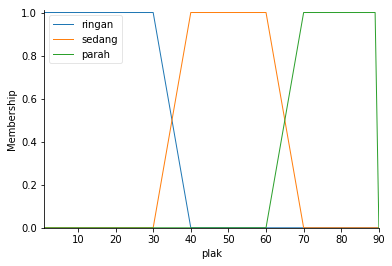

In [59]:
#membuat membership function untuk variabel plak
plak['ringan'] = fuzz.trapmf(plak.universe, [1, 1, 30, 40]) #membership function ringan, dg bentuk trapesium dg nilai 1 - 40
plak['sedang'] = fuzz.trapmf(plak.universe, [30, 40, 60, 70])  #membership function sedang, dg bentuk trapesium dg nilai 30 - 70
plak['parah'] = fuzz.trapmf(plak.universe, [60, 70, 89.001, 90]) #membership function parah, dg bentuk segitiga dg nilai 60 - 90
plak.view()#mencetak membership function plak dalam satu grafik

## Deklarasi Plak sebagai Variabel Input 1

Fungsi Keanggotaan Gusi Meradang(Ringan), Gusi Meradang(Sedang) dan Gusi Meradang(Parah)

$ Plak  [Ringan] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 40 \\
       {40-x \over 40-30} & \mbox{; } 30 < x < 40 \\
       1 & \mbox{; } x \leq 30
    \end{array}
\right.$

$ Plak  [Sedang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 30 \mbox{ atau}   0 & \mbox{; } x \geq 70 \\
       {x-30 \over 40-30} & \mbox{; } 30 < x < 40 \\
       {70-x \over 70-60} & \mbox{; } 60 < x < 70 \\
       1 & \mbox{; } 40 \leq x \leq 70
    \end{array}
\right.$

$ Plak  [Parah] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 40 \\
       {x-60 \over 70-60} & \mbox{; } 60 < x < 70 \\
       1 & \mbox{; } x \leq 70
    \end{array}
\right.$

C:\Users\Ayu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


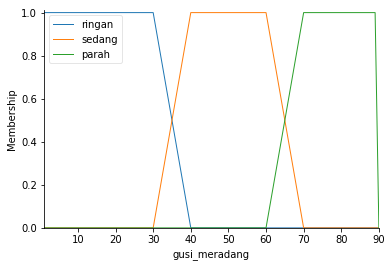

In [60]:
#membuat membership function untuk variabel gusi_meradang
gusi_meradang['ringan'] = fuzz.trapmf(gusi_meradang.universe, [1, 1, 30, 40])#membership function ringan, dalam bentuk trapesium dengan nilai 0 - 40
gusi_meradang['sedang'] = fuzz.trapmf(gusi_meradang.universe, [30, 40, 60, 70])#membership function sedang, dalam bentuk trapesium dengan nilai 30 - 70
gusi_meradang['parah'] = fuzz.trapmf(gusi_meradang.universe, [60, 70, 89.001, 90])#membership function parah, dalam bentuk trapesium dengan nilai 60 - 90
gusi_meradang.view()#mencetak membership function gusi_meradang dalam satu grafik

## Deklarasi Plak sebagai Variabel Input 1

Fungsi Keanggotaan Gusi Memerah(Ringan), Gusi Memerah(Sedang) dan Gusi Memerah(Parah)

$ Plak  [Ringan] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \geq 40 \\
       {40-x \over 40-30} & \mbox{; } 30 < x < 40 \\
       1 & \mbox{; } x \leq 30
    \end{array}
\right.$

$ Plak  [Sedang] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 30 \mbox{ atau}   0 & \mbox{; } x \geq 70 \\
       {x-30 \over 40-30} & \mbox{; } 30 < x < 40 \\
       {70-x \over 70-60} & \mbox{; } 60 < x < 70 \\
       1 & \mbox{; } 40 \leq x \leq 70
    \end{array}
\right.$

$ Plak  [Parah] = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq 40 \\
       {x-60 \over 70-60} & \mbox{; } 60 < x < 70 \\
       1 & \mbox{; } x \leq 70
    \end{array}
\right.$

C:\Users\Ayu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


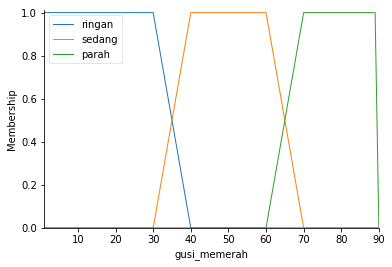

In [61]:
#membuat membership function untuk variabel gusi_memerah
gusi_memerah['ringan'] = fuzz.trapmf(gusi_memerah.universe, [1, 1, 30, 40])#membership function ringan, dalam bentuk trapesium dengan nilai 1 - 40
gusi_memerah['sedang'] = fuzz.trapmf(gusi_memerah.universe, [30, 40, 60, 70])#membership function sedang, dalam bentuk trapesium dengan nilai 30 - 70
gusi_memerah['parah'] = fuzz.trapmf(gusi_memerah.universe, [60, 70, 89.001, 90])#membership function parah, dalam bentuk trapesium dengan nilai 60 - 90
gusi_memerah.view()#mencetak membership function gusi_memerah dalam satu grafik

C:\Users\Ayu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


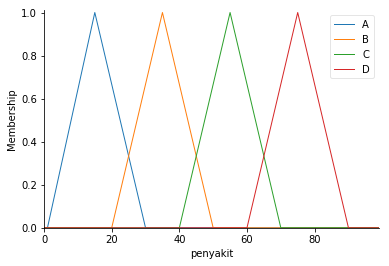

In [62]:
#membuat membership function untuk variabel penyakit
penyakit['A'] = fuzz.trimf(penyakit.universe,(1,15,30)) #membership function pulpitis, dalam bentuk trapesium dengan nilai 1 - 30
penyakit['B'] = fuzz.trimf(penyakit.universe,(20,35,50)) #membership function gingvitis, dalam bentuk segitiga dengan nilai 30 - 50
penyakit['C'] = fuzz.trimf(penyakit.universe,(40,55,70)) #membership function periodontitis, dalam bentuk segitiga dengan nilai 50 - 70
penyakit['D'] = fuzz.trimf(penyakit.universe,(60,75,90)) #membership function advence periodontitis, dalam bentuk trapesium dengan nilai 60 - 90
penyakit.view() #mencetak membership function penyakit dalam satu grafik

## Rule Base

|Rule|    Plak   | Gusi Meradang | Gusi Memerah | Penyakit |
|----|-----------|---------------|--------------|----------|
| 1  |   Ringan  |     Ringan    |    Ringan    |     A    |
| 2  |   Ringan  |     Ringan    |    Sedang    |     A    |
| 3  |   Ringan  |     Ringan    |    Parah     |     A    |
| 4  |   Ringan  |     Sedang    |    Ringan    |     B    |
| 5  |   Ringan  |     Sedang    |    Sedang    |     B    |
| 6  |   Ringan  |     Sedang    |    Parah     |     C    |
| 7  |   Ringan  |     Parah     |    Ringan    |     C    |
| 8  |   Ringan  |     Parah     |    Sedang    |     D    |
| 9  |   Ringan  |     Parah     |    Parah     |     D    |
| 10 |   Sedang  |     Ringan    |    Ringan    |     A    |
| 11 |   Sedang  |     Ringan    |    Sedang    |     B    |
| 12 |   Sedang  |     Ringan    |    Parah     |     C    |
| 13 |   Sedang  |     Sedang    |    Ringan    |     B    |
| 14 |   Sedang  |     Sedang    |    Sedang    |     C    |
| 15 |   Sedang  |     Sedang    |    Parah     |     D    |
| 16 |   Sedang  |     Parah     |    Ringan    |     C    |
| 17 |   Sedang  |     Parah     |    Sedang    |     D    |
| 18 |   Sedang  |     Parah     |    Parah     |     D    |
| 19 |   Parah   |     Ringan    |    Ringan    |     C    |
| 20 |   Parah   |     Ringan    |    Sedang    |     D    |
| 21 |   Parah   |     Ringan    |    Parah     |     D    |
| 22 |   Parah   |     Sedang    |    Ringan    |     D    |
| 23 |   Parah   |     Sedang    |    Sedang    |     D    |
| 24 |   Parah   |     Sedang    |    Parah     |     D    |
| 25 |   Parah   |     Parah     |    Ringan    |     D    |
| 26 |   Parah   |     Parah     |    Sedang    |     D    |
| 27 |   Parah   |     Parah     |    Parah     |     D    |

C:\Users\Ayu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b3ac287748>)

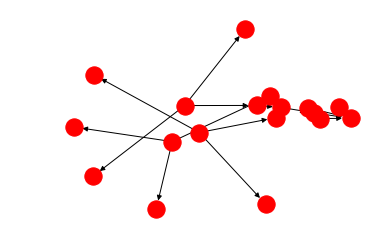

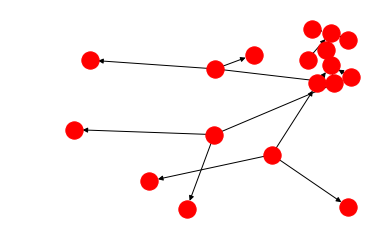

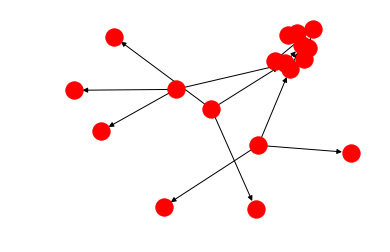

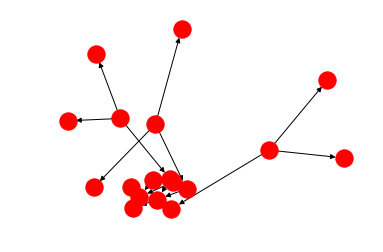

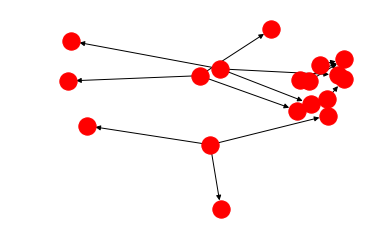

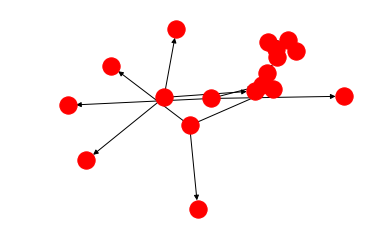

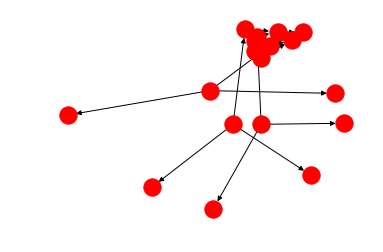

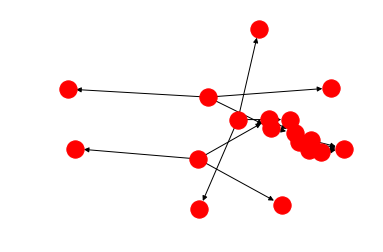

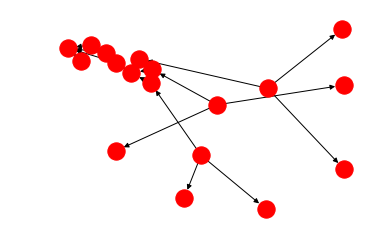

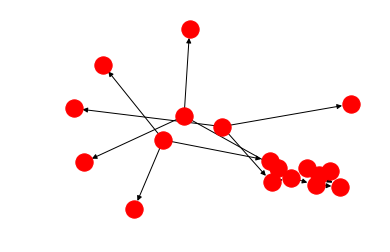

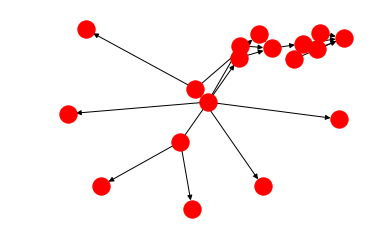

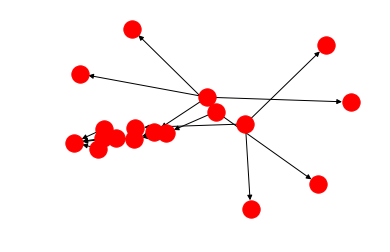

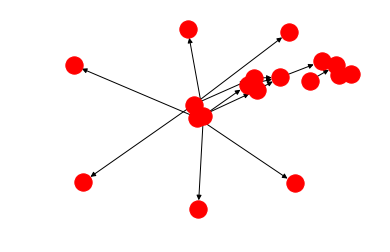

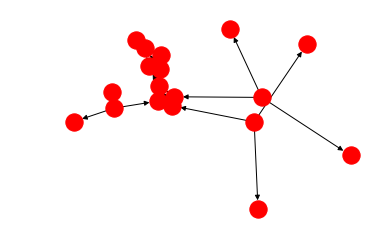

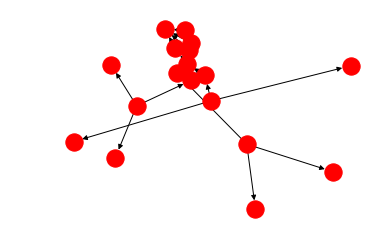

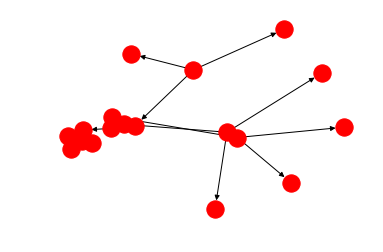

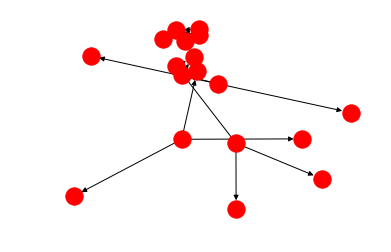

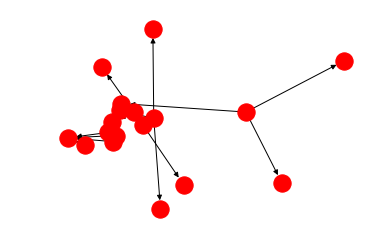

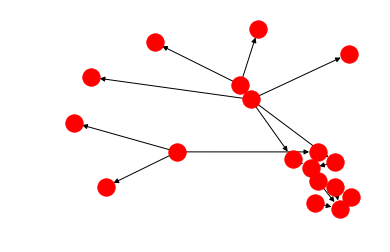

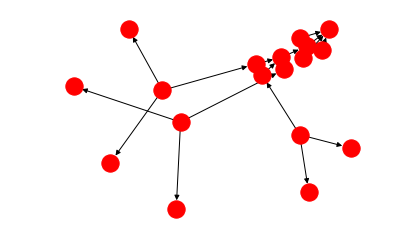

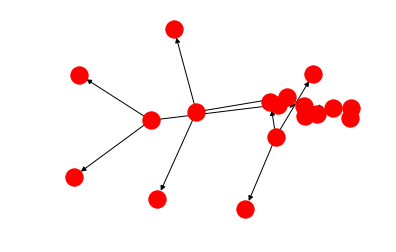

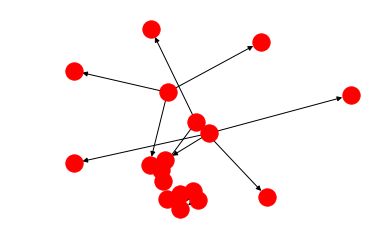

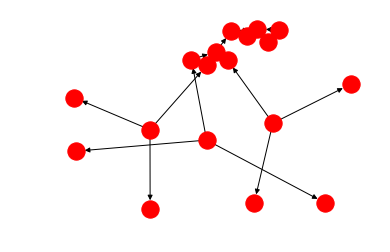

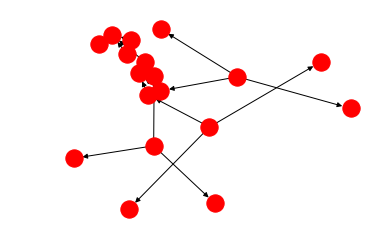

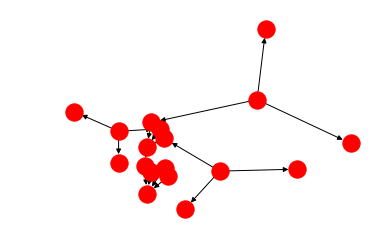

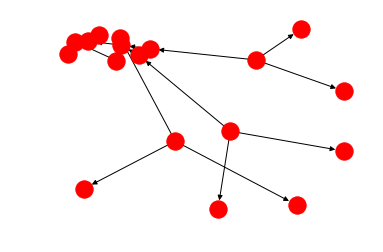

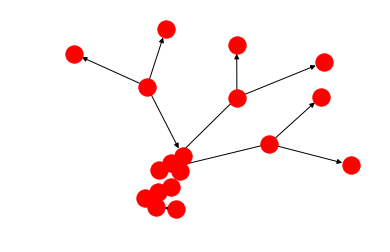

In [63]:
#membuat aturan untuk menentukan penyakit 
#karena input ada 3 dan setiap input mempunyai tiga kondisi maka saya membuat 27 aturan atau 3^3
rule1 = ctrl.Rule(plak['ringan'] & gusi_meradang['ringan'] & gusi_memerah['ringan'], penyakit['A'])
rule2 = ctrl.Rule(plak['ringan'] & gusi_meradang['ringan'] & gusi_memerah['sedang'], penyakit['A'])
rule3 = ctrl.Rule(plak['ringan'] & gusi_meradang['ringan'] & gusi_memerah['parah'], penyakit['A'])
rule4 = ctrl.Rule(plak['ringan'] & gusi_meradang['sedang'] & gusi_memerah['ringan'], penyakit['B'])
rule5 = ctrl.Rule(plak['ringan'] & gusi_meradang['sedang'] & gusi_memerah['sedang'], penyakit['B'])
rule6 = ctrl.Rule(plak['ringan'] & gusi_meradang['sedang'] & gusi_memerah['parah'], penyakit['C'])
rule7 = ctrl.Rule(plak['ringan'] & gusi_meradang['parah'] & gusi_memerah['ringan'], penyakit['C'])
rule8 = ctrl.Rule(plak['ringan'] & gusi_meradang['parah'] & gusi_memerah['sedang'], penyakit['D'])
rule9 = ctrl.Rule(plak['ringan'] & gusi_meradang['parah'] & gusi_memerah['parah'], penyakit['D'])

rule10 = ctrl.Rule(plak['sedang'] & gusi_meradang['ringan'] & gusi_memerah['ringan'], penyakit['A'])
rule11 = ctrl.Rule(plak['sedang'] & gusi_meradang['ringan'] & gusi_memerah['sedang'], penyakit['B'])
rule12 = ctrl.Rule(plak['sedang'] & gusi_meradang['ringan'] & gusi_memerah['parah'], penyakit['C'])
rule13 = ctrl.Rule(plak['sedang'] & gusi_meradang['sedang'] & gusi_memerah['ringan'], penyakit['B'])
rule14 = ctrl.Rule(plak['sedang'] & gusi_meradang['sedang'] & gusi_memerah['sedang'], penyakit['C'])
rule15 = ctrl.Rule(plak['sedang'] & gusi_meradang['sedang'] & gusi_memerah['parah'], penyakit['D'])
rule16 = ctrl.Rule(plak['sedang'] & gusi_meradang['parah'] & gusi_memerah['ringan'], penyakit['C'])
rule17 = ctrl.Rule(plak['sedang'] & gusi_meradang['parah'] & gusi_memerah['sedang'], penyakit['D'])
rule18 = ctrl.Rule(plak['sedang'] & gusi_meradang['parah'] & gusi_memerah['parah'], penyakit['D'])

rule19 = ctrl.Rule(plak['parah'] & gusi_meradang['ringan'] & gusi_memerah['ringan'], penyakit['C'])
rule20 = ctrl.Rule(plak['parah'] & gusi_meradang['ringan'] & gusi_memerah['sedang'], penyakit['D'])
rule21 = ctrl.Rule(plak['parah'] & gusi_meradang['ringan'] & gusi_memerah['parah'], penyakit['D'])
rule22 = ctrl.Rule(plak['parah'] & gusi_meradang['sedang'] & gusi_memerah['ringan'], penyakit['D'])
rule23 = ctrl.Rule(plak['parah'] & gusi_meradang['sedang'] & gusi_memerah['sedang'], penyakit['D'])
rule24 = ctrl.Rule(plak['parah'] & gusi_meradang['sedang'] & gusi_memerah['parah'], penyakit['D'])
rule25 = ctrl.Rule(plak['parah'] & gusi_meradang['parah'] & gusi_memerah['ringan'], penyakit['D'])
rule26 = ctrl.Rule(plak['parah'] & gusi_meradang['parah'] & gusi_memerah['sedang'], penyakit['D'])
rule27 = ctrl.Rule(plak['parah'] & gusi_meradang['parah'] & gusi_memerah['parah'], penyakit['D'])

rule1.view()#mencetak gambar aturan
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()
rule10.view()
rule11.view()
rule12.view()
rule13.view()
rule14.view()
rule15.view()
rule16.view()
rule17.view()
rule18.view()
rule19.view()
rule20.view()
rule21.view()
rule22.view()
rule23.view()
rule24.view()
rule25.view()
rule26.view()
rule27.view()

## Fuzzy Inference

Dari beberapa metode dalam fuzzy inference system, metode yang digunakan adalah Metode Mamdani.

In [64]:
#membuat kontrol sistem yang kondisi nya diambil berdasarkan aturan/rule yang telah dibuat
tipping1 = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, 
                                rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18,
                                rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27,])

<div class="">
Untuk mensimulasikan sistem kontrol ini, maka dibuat ControlSystemSimulation. Objek ini mewakili pengontrol yang diterapkan pada serangkaian situasi tertentu. 

In [65]:
#membuat simulasi kontrol sistem yang kondisinya di ambil berdasarkan kriteria1/sistem kontrol yg telah kita buat
tipping= ctrl.ControlSystemSimulation(tipping1)

## Defuzzifikasi
Defuzzifikasi merupakan pengubahan output fuzzy yang diperoleh dari mesin inferensi menjadi nilai tegas menggunakan fungsi keanggotaan yang sesuai dengan saat dilakukan fuzzyfikasi. Sekarang kita dapat mensimulasikan sistem kontrol hanya dengan menentukan input dan memanggil metode komputasi. 

## Contoh Kasus
Misalkan kita memasukkan nilai 16 untuk plal, nilai 66 untuk gusi meradang, dan  nilai 36 untuk gusi memerah, maka paper tersebut tergolong dalam penyakit A(Pulpitis), B(Gingvitis), C(Periodontitis) dan D(Advance Periodontitis)

1. $Input.Plak Ringan[17] =
\left\{
    \begin{array}{ll}
       {40-17 \over 40-30} = 2.3 \\
    \end{array}
\right.$

2. $Input.Gusi Meradang Sedang[67] =
\left\{
    \begin{array}{ll}
       {70-67 \over 70-60} = 0.33 \\
    \end{array}
\right.$

3. $Input.Gusi Meradang Parah[67] =
\left\{
    \begin{array}{ll}
       {67-60 \over 90-60} =0.23 \\
    \end{array}
\right.$

4. $Input.Gusi Memerah[27] =
\left\{
    \begin{array}{ll}
       {40-27 \over 40-30} =1.3 \\
    \end{array}
\right.$

In [71]:
tipping.input['plak'] = 17 #memasukkan nilai plak  kedalam kontrol sistem berdasarkan kondisi yang telah dibuat
tipping.input['gusi_meradang'] = 67 #memasukkan nilai gusi meradang kedalam kontrol sistem berdasarkan kondisi yang telah dibuat
tipping.input['gusi_memerah'] =  27 #memasukkan gusi memerah kedalam kontrol sistem berdasarkan kondisi yang telah dibuat

tipping.compute() #menghitung jumlahnya

## Evaluasi Rule Base
<br>Rulebase ke-4
<br>If plak ringan and gusi meradang sedang and gusi memerah ringan then penyakit B(Gingvitis)
<br>Min: 2,3; 0,33; 1,3
<br>Output penyakit B(Gingvitis)(2,3; 0,33; 1,3) = 0,33
<br>
<br>Rulebase ke-7
<br>If plak ringan and gusi meradang parah and gusi memerah ringan then penyakit C(Periodontitis)
<br>Min: 2,3; 0,23; 1,3
<br>Output penyakit C(Gingvitis)(2,3; 0,23; 1,3) = 0,23



### Menentukan hasil akhir yaitu menggunkan metode COG (Centre Of Gravity)
$COG =
\left\{
    \begin{array}{ll}
       {( (31.33x1.05 + (37.5x37.5) + (60.5x3.85) + (55,5 x 7.7) + (63.33 x 3.5) ) \over (1.05+6.3+3.85+7.7+3.5)} = 51.386 \\
    \end{array}
\right.$

In [77]:
print(tipping.output['penyakit'])

48.051928783382785


C:\Users\Ayu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


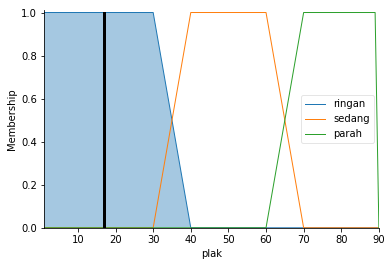

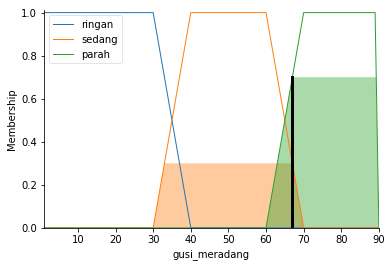

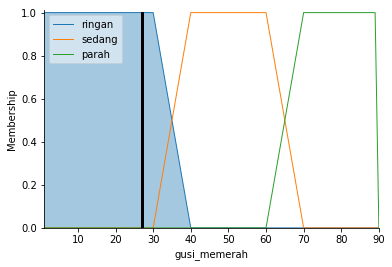

In [73]:
plak.view(sim=tipping)
gusi_meradang.view(sim=tipping)
gusi_memerah.view(sim=tipping)

48.051928783382785


C:\Users\Ayu\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


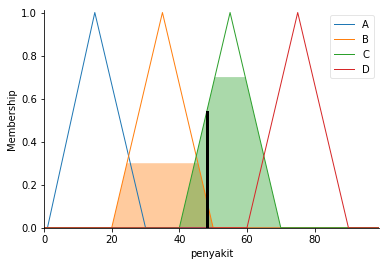

In [74]:
print(tipping.output['penyakit']) #mencetak output penyakit berdasarkan kondisi yg telah di penuhi
penyakit.view (sim=tipping)#membuat plot/grafik dari penyakit dengan kondisi berada pada kriteria yang telah terpenuhi